
## Universidad Nacional de Colombia

Sistemas de Transporte de Energía Eléctrica

J.S. Torregrosa-Palmett - C.C 1193036531

##### *Abstract— esta solución ofrecerá una visión integral de Formulación y Taller para el Cálculo de Pérdidas por Efecto Corona en Líneas Aéreas de Alta Tensión explorando diferentes enfoques y consideraciones para obtener un entendimiento sólido de las características eléctricas de la línea y su impacto en la operación del sistema eléctrico.*

##  INTRODUCCIÓN

Este extenso documento sobre el cálculo de pérdidas por efecto corona en líneas aéreas de alta tensión ofrece un detallado viaje a través de los diversos aspectos y métodos asociados con este fenómeno eléctrico. Desde la introducción, que desentraña la producción y fuentes del efecto corona, hasta las técnicas para atenuarlo en líneas de transmisión, el trabajo aborda de manera exhaustiva cada aspecto del tema.

El núcleo del trabajo se encuentra en el taller de cálculo de pérdidas corona, donde se desglosa minuciosamente el método de Peterson para el cálculo de pérdidas en buen tiempo y el método de Electricité de France, C. Gary y M. Moreau Clade para pérdidas en mal tiempo. Los diferentes pasos, desde ajustes de ecuaciones hasta la evaluación de pérdidas en condiciones específicas de lluvia y variaciones en el radio del conductor, ofrecen una comprensión profunda y aplicada.

La solución al taller presenta una síntesis hábil de los resultados obtenidos, destacando la importancia de considerar factores como la altitud sobre el nivel del mar y la variación en el radio del conductor. Además, se proporciona una mirada detallada a través de los campos eléctricos superficiales, gradientes críticos de iniciación corona y pérdidas en diferentes condiciones climáticas.

## DESARROLLO

* *A.  Taller Cálculo de Pérdidas Corona en Líneas de 230 kV   -  Ajuste de ecuación de temperatura vs hsnm*

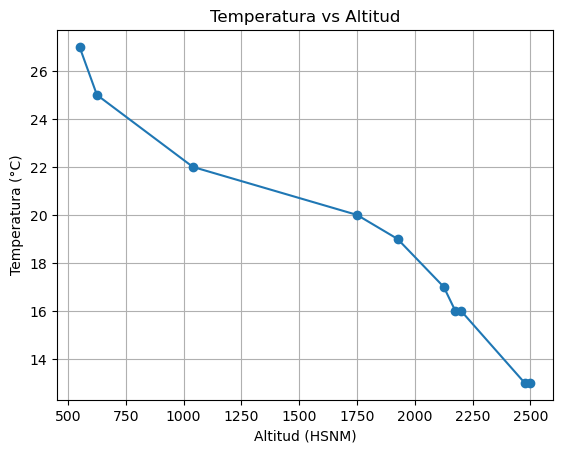

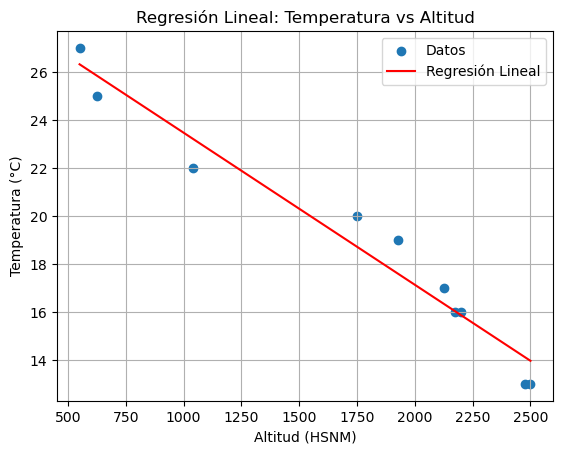

Ecuación de la regresión lineal: Temp = -0.0063 * HSNM + 29.8024
Densidad del aire [1.101019918296045, 1.0984689145866726, 1.0552232237911061, 0.9734152692379358, 0.9556603343834424, 0.9384385559916792, 0.9357901517870635, 0.9328507178479674, 0.9104822761069381, 0.9076032489906559]


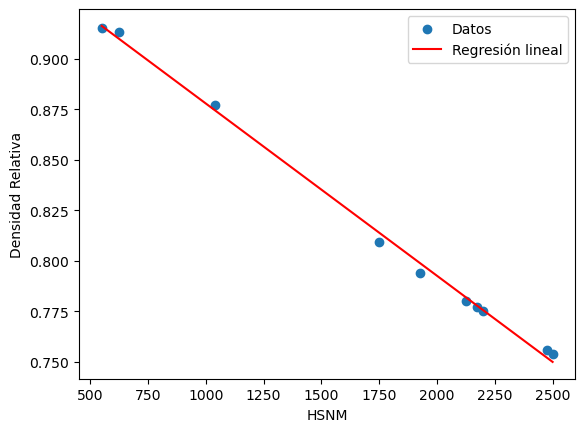

Ecuación de la regresión lineal: Densidad Relativa = -0.0001 * HSNM + 0.9631
[0.9172438655721281, 0.9102537213920164, 0.8725268047365763, 0.8115722173088536, 0.7972141799441594, 0.781115772715917, 0.7771422234383878, 0.7751630353059613, 0.7537218308721494, 0.7518022886598978]


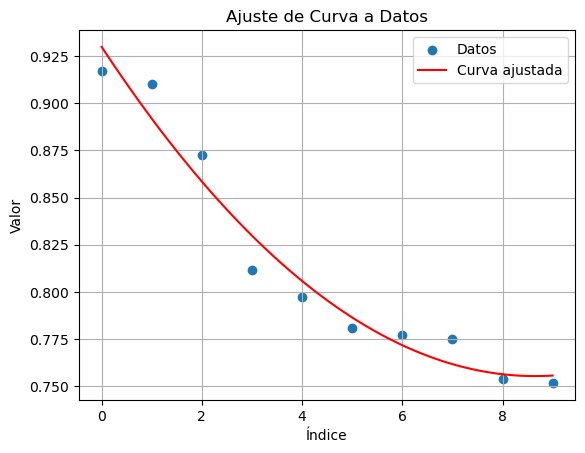

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

Municipios = ['SantaFe','Anza', 'San Carlos','Argelia', 'Guatape', 'Rionegro','Retiro','La Ceja','Sonsón','La Unión']
HSNM = np.array([550,625,1040,1750,1925,2125,2175,2200,2475,2500])
Temp = np.array([27,25,22,20,19,17,16,16,13,13])
coefficients = np.polyfit(HSNM, Temp, 1)
m, b = coefficients
equation = f'Temp = {m:.4f} * HSNM + {b:.4f}'


plt.plot(HSNM, Temp, marker='o')
plt.title('Temperatura vs Altitud')
plt.xlabel('Altitud (HSNM)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


plt.scatter(HSNM, Temp, label='Datos')
plt.plot(HSNM, m * HSNM + b, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal: Temperatura vs Altitud')
plt.xlabel('Altitud (HSNM)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

print('Ecuación de la regresión lineal:', equation)

T= [(-0.0063 * h + 29.8024) for h in HSNM]
d= [(1.292 - 1.5238e-4 * h + 6.3768e-9 * h**2) / (1 + 0.00367 * Tprom) for h, Tprom in zip(HSNM, Temp)]

print('Densidad del aire', d)

from scipy.stats import linregress


densidad_rel=[0.915,0.913,0.877,0.809,0.794,0.780,0.777,0.775,0.756,0.754]

slope, intercept, r_value, p_value, std_err = linregress(HSNM, densidad_rel)

predicciones = slope * HSNM + intercept

plt.scatter(HSNM, densidad_rel, label='Datos')
plt.plot(HSNM, predicciones, 'r', label='Regresión lineal')
plt.xlabel('HSNM')
plt.ylabel('Densidad Relativa')
plt.legend()
plt.show()

print(f"Ecuación de la regresión lineal: Densidad Relativa = {slope:.4f} * HSNM + {intercept:.4f}")

drex=[0.970172*math.exp(-0.000102*h) for h in HSNM]
print(drex)

x = np.arange(len(drex))

coefficients = np.polyfit(x, drex, 2)
polynomial = np.poly1d(coefficients)

x_fit = np.linspace(0, len(drex)-1, 100)
y_fit = polynomial(x_fit)

plt.scatter(x, drex, label='Datos')
plt.plot(x_fit, y_fit, label='Curva ajustada', color='red')
plt.title('Ajuste de Curva a Datos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

* *Cálculo de campos eléctricos superficiales y gradientes críticos de iniciación corona*

In [ ]:
import numpy as np
from numpy.linalg import inv

H = 25
R_cond_fase = (31.978e-3) / 2
R_guarda = (9.78e-3) / 2
V_nom = 230e3
epsilon_0 = 8.8541878176

def pitagoras(a, b):
    return np.sqrt(a**2 + b**2)

Distancias_a_cond = np.array([
    [0, pitagoras(4.7*2, 6), 6, pitagoras(7, 4.7)],
    [pitagoras(4.7*2, 6), 0, 4.7*2, pitagoras(4.7, 13)],
    [6, 4.7*2, 0, pitagoras(4.7, 13)],
    [pitagoras(7, 4.7), pitagoras(4.7, 13), pitagoras(4.7, 13), 0]
])

Distancias_a_img = np.array([
    [31*2, pitagoras(31+25, 4.7*2), 31+25, pitagoras(31+38, 4.7)],
    [pitagoras(31+25, 4.7*2), 25*2, pitagoras(25*2, 4.7*2), pitagoras(25+38, 4.7)],
    [25+31, pitagoras(25*2, 4.7*2), 25*2, pitagoras(25+38, 4.7)],
    [pitagoras(31+38, 4.7), pitagoras(25+38, 4.7), pitagoras(25+38, 4.7), 38*2]
])

print('Distancia a Imagenes' , Distancias_a_img)
print()
print('Distancia a Conductor' , Distancias_a_cond)
print()

lambda_abc = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        if i == j:
            if i == 3:
                lambda_abc[i, j] = np.log(Distancias_a_img[i, j] / R_guarda)
                continue
            lambda_abc[i, j] = np.log(Distancias_a_img[i, j] / R_cond_fase)
            continue
        lambda_abc[i, j] = np.log(Distancias_a_img[i, j] / Distancias_a_cond[i, j])

print('Lambda', lambda_abc)
print(  )
lambda_abc_inv = inv(lambda_abc)

print('lambda invertida', lambda_abc_inv)
print()

V_vector = np.array([230/np.sqrt(3),
                    230/np.sqrt(3)*(np.cos(np.radians(-120)) + 1j*np.sin(np.radians(-120))),
                    230/np.sqrt(3)*(np.cos(np.radians(120)) + 1j*np.sin(np.radians(120))),
                    0])

print('Vvector', V_vector)
print()

Q = np.dot(lambda_abc_inv, V_vector)

print('Q', Q)
print()

Mag_Q = np.abs(Q)

print('Magnitud de Q', Mag_Q)
print()

def E_x_func(Q, xi, yi, x, y):
    return Q * ((x - xi) / ((x - xi)**2 + (y - yi)**2) - (x - xi) / ((x - xi)**2 + (y + yi)**2))

def E_y_func(Q, xi, yi, x, y):
    return Q * ((y - yi) / ((x - xi)**2 + (y - yi)**2) - (y + yi) / ((x - xi)**2 + (y + yi)**2))

xo = np.array([4.7, -4.7, 4.7, 0])
yo = np.array([31, 25, 25, 38])
R = np.array([R_cond_fase, R_cond_fase, R_cond_fase, R_guarda])

print('R', R)
print()

print('R', R)
print()

Ex = E_x_func(Q, xo, yo, xo + R, yo) / 100
Ey = E_y_func(Q, xo, yo, xo + R, yo) / 100

print('Ex', Ex)
print()

print('Ey', Ey)
print()

E_rms = np.abs(Ex + Ey)

print('Erms', E_rms)
print()


Distancia a Imagenes [[62.         56.78344829 56.         69.15988722]
 [56.78344829 50.         50.87592751 63.1750742 ]
 [56.         50.87592751 50.         63.1750742 ]
 [69.15988722 63.1750742  63.1750742  76.        ]]

Distancia a Conductor [[ 0.         11.15168149  6.          8.4314886 ]
 [11.15168149  0.          9.4        13.82353066]
 [ 6.          9.4         0.         13.82353066]
 [ 8.4314886  13.82353066 13.82353066  0.        ]]

Lambda [[8.26298868 1.62765459 2.23359222 2.10444769]
 [1.62765459 8.0478773  1.68868019 1.51953757]
 [2.23359222 1.68868019 8.0478773  1.51953757]
 [2.10444769 1.51953757 1.51953757 9.65129632]]

lambda invertida [[ 0.13845222 -0.01732078 -0.03051323 -0.02265808]
 [-0.01732078  0.13480007 -0.02080207 -0.01417152]
 [-0.03051323 -0.02080207  0.13935795 -0.01201254]
 [-0.02265808 -0.01417152 -0.01201254  0.1126761 ]]

Vvector [132.79056191  +0.j -66.39528096-115.j -66.39528096+115.j
   0.          +0.j]

Q [ 21.56110018 -1.5171321j   -9.8689

* *Pérdidas en buen tiempo*

In [ ]:
import numpy as np
from math import sqrt, log10, exp
import math

HSNM_calcs = [500,1000,2000,3000]
E_rms =[13.51481315,12.77674627,13.71814102,2.64669627]

R_condu_fase=R[1]
d_r_func= [0.970172*math.exp(-0.000102*h) for h in HSNM_calcs]

E_0 = [30*math.sqrt(2)*0.75*(1-0.07*R_cond_fase*100)*(d_r_func)**(2/3) for d_r_func, HSNM_calcs in zip(d_r_func,HSNM_calcs)]

print(HSNM_calcs)
print(d_r_func)
print(E_0)

E_c = [30*d_r_func*(1+0.3/math.sqrt(R_cond_fase*d_r_func*100)) for d_r_func in d_r_func]
print(E_c)

E_E0 = [E_rms / E_0 for E_rms,E_0  in zip(E_rms,E_0)]
print(E_E0)

def pitagoras(a, b, c):
    return sqrt(a**2 + b**2 + c**2)

def K_h_fun(EE0):
    return exp(0.2354 + 1.0443 * EE0)

def PHI_fun(K):
    return 1e-3 * exp(K)

def P_BT_fun(phi, DMG, R_cond_fase):
    return (20.94e-6 * 60 * 230**2 * phi) / (log10(DMG / R_cond_fase)**2)

print("HSNM_calcs:", HSNM_calcs)
print("d_r_func:", d_r_func)
print("E_0:", E_0)

E_c = [30 * d_r_func_i * (1 + 0.3 / sqrt(R_cond_fase * d_r_func_i * 100)) for d_r_func_i in d_r_func]
print("E_c:", E_c)

E_E0 = [E_rms_i / E_0_i for E_rms_i, E_0_i in zip(E_rms, E_0)]
print("E_E0:", E_E0)

# Additional code
DMG = pitagoras(4.7 * 2, 6, 4.7 * 2)
print("DMG:", DMG)

P_BT_h = [[K_h_fun(E_E0_i), PHI_fun(K_h_fun(E_E0_i)), P_BT_fun(PHI_fun(K_h_fun(E_E0_i)), DMG, R_cond_fase)] for E_E0_i in E_E0]

P_BT_h1= [2.67]
P_BT_h2= P_BT_h[1]
P_BT_h3= P_BT_h[2]
P_BT_h4= P_BT_h[3]

print("P_BT_h1:", P_BT_h[0])
print("P_BT_h2:", P_BT_h[1])
print("P_BT_h3:", P_BT_h[2])
print("P_BT_h4:", P_BT_h[3])


[500, 1000, 2000, 3000]
[0.9219337583477858, 0.8760939862016975, 0.7911387595795182, 0.7144216793709636]
[26.767919467633625, 25.873108195846235, 24.172222315965794, 22.58315186832789]
[34.49211885204809, 32.94485915413107, 30.064956891175175, 27.448668985492642]
[0.5048884417909808, 0.4938234004699608, 0.5675167487988535, 0.11719782453006052]
HSNM_calcs: [500, 1000, 2000, 3000]
d_r_func: [0.9219337583477858, 0.8760939862016975, 0.7911387595795182, 0.7144216793709636]
E_0: [26.767919467633625, 25.873108195846235, 24.172222315965794, 22.58315186832789]
E_c: [34.49211885204809, 32.94485915413107, 30.064956891175175, 27.448668985492642]
E_E0: [0.5048884417909808, 0.4938234004699608, 0.5675167487988535, 0.11719782453006052]
DMG: 14.584923722803628
P_BT_h1: [2.1439608864080584, 0.008533169696209215, 0.06472711435316154]
P_BT_h2: [2.1193295255099516, 0.00832555354468396, 0.06315227231207236]
P_BT_h3: [2.2888688436003672, 0.00986377389740223, 0.07482021848159323]
P_BT_h4: [1.4301648082518337,

# CONCLUSIONES

* Se observa una disminución en la densidad del aire a medida que la altitud aumenta, lo que afecta directamente las características del sistema de transporte de energía eléctrica.

* Se ha calculado el campo eléctrico superficial mediante el uso de diversas funciones y ecuaciones, teniendo en cuenta la geometría del sistema y las distancias entre conductores.

* La matriz de impedancia inversa se ha calculado para el sistema, y se ha determinado el vector de voltajes en el sistema trifásico.

* Se han estimado las pérdidas por efecto corona tanto en condiciones climáticas normales como en días lluviosos, considerando la condición del conductor (nuevo o viejo).

* Se presenta un análisis detallado de las pérdidas por efecto corona en función de la altitud, con gráficos que muestran las aproximaciones para conductores nuevos y viejos, así como ajustes de curvas para una mejor comprensión de los resultados.







##  REFERENCIAS

* [1]	L. Cardona. (2023, Oct). Taller para el Cálculo de Pérdidas por Efecto Corona en Líneas Aéreas de Alta Tensión

* [2]	OpenAI. "Respuesta proporcionada por ChatGPT." Mensaje de chat generado por ChatGPT. Available on: https://chat.openai.com
